### Implement XOR gate using 2-layer Neural Network 
- Use Adadelta optimizer 
- Plot accuracy vs epoch 

In [29]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [30]:
X = np.array([[0,0],[0,1],[1,1],[1,0]])

In [31]:
y = np.array([0,1,0,1])

In [32]:
w1 = np.random.rand(2,2)
b1 = np.random.rand(1)
w2 = np.random.rand(1,1)
b2 = np.random.rand(1)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [34]:
model = Sequential([
    Input(shape=(2,)),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [35]:
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(X, y, epochs=100)

Epoch 1/100


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.7500 - loss: 0.8847
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7500 - loss: 0.8847
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7500 - loss: 0.8846
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7500 - loss: 0.8846
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7500 - loss: 0.8846
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7500 - loss: 0.8846
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7500 - loss: 0.8846
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7500 - loss: 0.8846
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7500 - loss: 0.8846
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7500 - loss: 0.8846
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7500 - loss: 0.8846
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7500 - loss: 0.8846


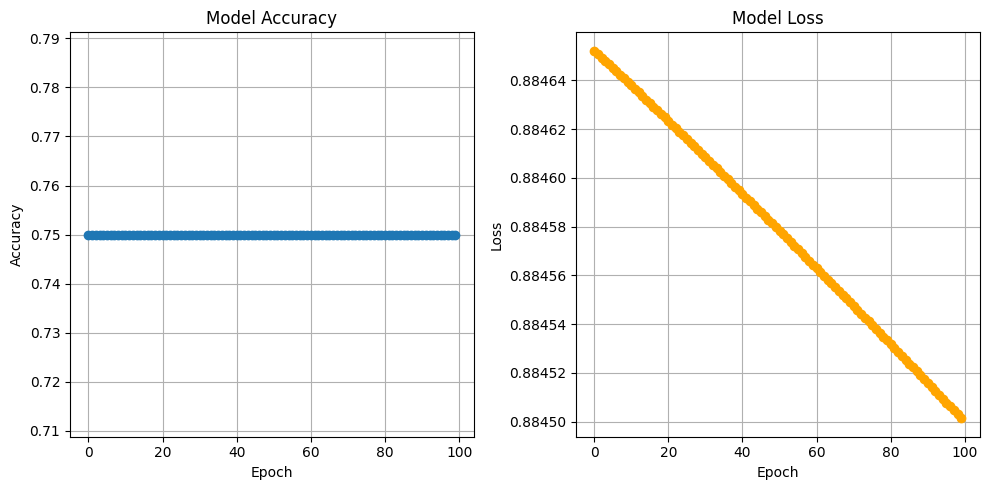


XOR Gate Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Input: [0 0] → Predicted: 0, Actual: 0
Input: [0 1] → Predicted: 1, Actual: 1
Input: [1 1] → Predicted: 1, Actual: 0
Input: [1 0] → Predicted: 1, Actual: 1


In [37]:
import matplotlib.pyplot as plt

# Plot accuracy vs epoch
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

# Test predictions
print("\n" + "="*40)
print("XOR Gate Predictions:")
print("="*40)
predictions = model.predict(X)
for i in range(len(X)):
    predicted = 1 if predictions[i] > 0.5 else 0
    print(f"Input: {X[i]} → Predicted: {predicted}, Actual: {y[i]}")
print("="*40)

### Use dataset with initial values X = [1.0, 2.0], Y = [0.5, 1.5]
- Initialize neural network with random weights 
- Compute output using linear activation
- Calculate MAE and MSE 
- Plot loss surface (weight vs loss) 

#### Initialize dataset and neural network

In [38]:
# Dataset
X_data = np.array([1.0, 2.0])
Y_data = np.array([0.5, 1.5])

# Initialize random weights and bias
np.random.seed(42)
w = np.random.randn()
b = np.random.randn()

print("Dataset:")
print(f"X = {X_data}")
print(f"Y = {Y_data}")
print(f"\nInitial weights:")
print(f"w = {w:.4f}")
print(f"b = {b:.4f}")

Dataset:
X = [1. 2.]
Y = [0.5 1.5]

Initial weights:
w = 0.4967
b = -0.1383


#### Compute output using linear activation

In [39]:
# Linear activation: y = w*x + b
Y_pred = w * X_data + b

print("Predictions (Linear Activation):")
print(f"Y_pred = {Y_pred}")
print(f"\nActual:")
print(f"Y = {Y_data}")

Predictions (Linear Activation):
Y_pred = [0.35844985 0.855164  ]

Actual:
Y = [0.5 1.5]


#### Calculate MAE and MSE

In [40]:
# Calculate errors
errors = Y_data - Y_pred

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(errors))

# Mean Squared Error (MSE)
mse = np.mean(errors ** 2)

print("Error Metrics:")
print("="*40)
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"RMSE (Root Mean Squared Error): {np.sqrt(mse):.4f}")
print("="*40)

Error Metrics:
MAE (Mean Absolute Error): 0.3932
MSE (Mean Squared Error): 0.2179
RMSE (Root Mean Squared Error): 0.4668


#### Plot loss surface (weight vs loss)

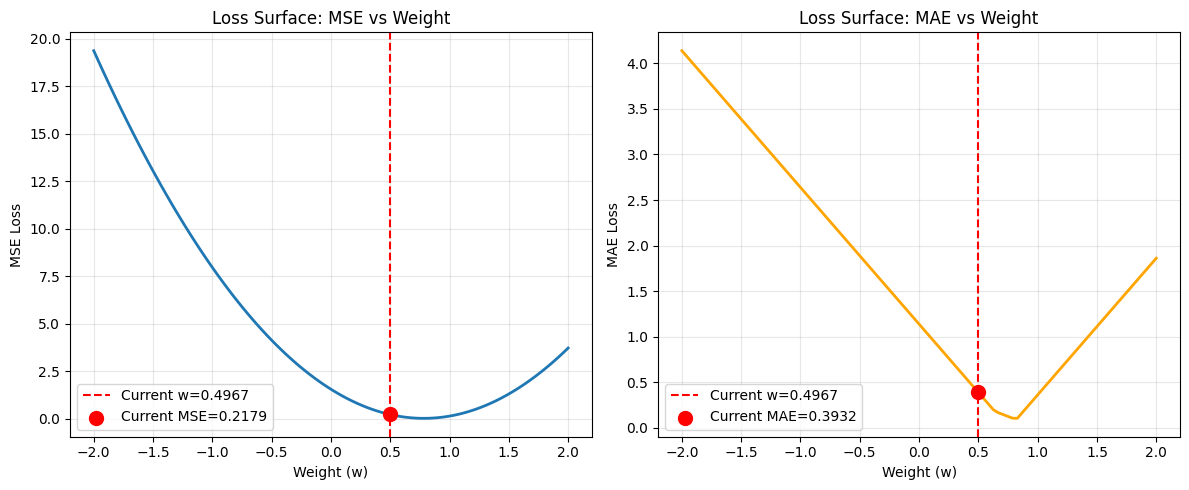

In [41]:
# Create a range of weight values
weights = np.linspace(-2, 2, 100)

# Calculate MSE for each weight value (keeping bias constant)
mse_values = []
for weight in weights:
    predictions = weight * X_data + b
    mse_val = np.mean((Y_data - predictions) ** 2)
    mse_values.append(mse_val)

# Plot loss surface
plt.figure(figsize=(12, 5))

# Plot 1: MSE vs Weight
plt.subplot(1, 2, 1)
plt.plot(weights, mse_values, linewidth=2)
plt.axvline(w, color='red', linestyle='--', label=f'Current w={w:.4f}')
plt.scatter([w], [mse], color='red', s=100, zorder=5, label=f'Current MSE={mse:.4f}')
plt.xlabel('Weight (w)')
plt.ylabel('MSE Loss')
plt.title('Loss Surface: MSE vs Weight')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: MAE vs Weight
mae_values = []
for weight in weights:
    predictions = weight * X_data + b
    mae_val = np.mean(np.abs(Y_data - predictions))
    mae_values.append(mae_val)

plt.subplot(1, 2, 2)
plt.plot(weights, mae_values, linewidth=2, color='orange')
plt.axvline(w, color='red', linestyle='--', label=f'Current w={w:.4f}')
plt.scatter([w], [mae], color='red', s=100, zorder=5, label=f'Current MAE={mae:.4f}')
plt.xlabel('Weight (w)')
plt.ylabel('MAE Loss')
plt.title('Loss Surface: MAE vs Weight')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### 3D Loss Surface (Weight vs Bias vs Loss)

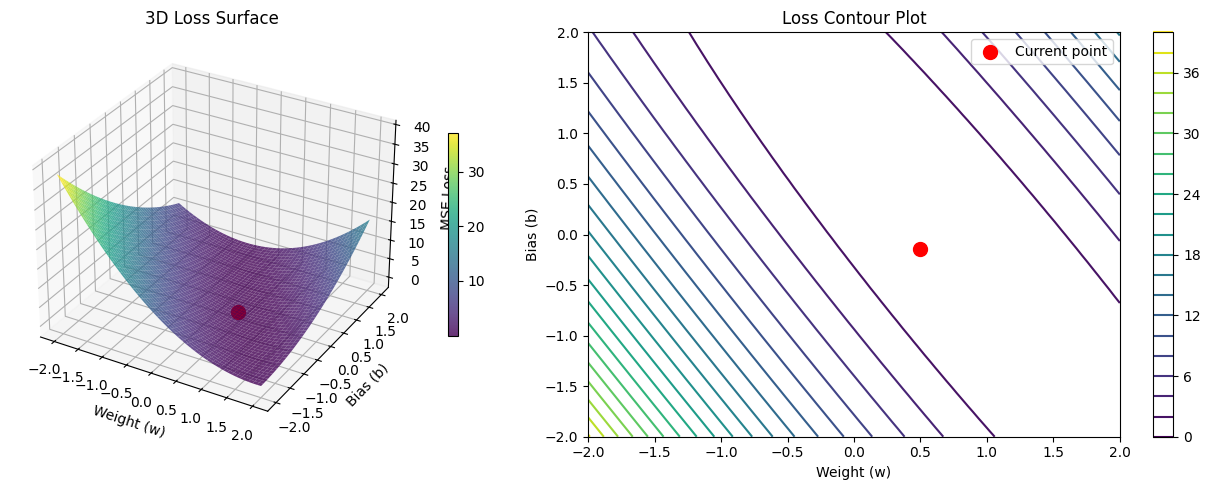


Current position: w=0.4967, b=-0.1383, MSE=0.2179


In [42]:
# Create mesh grid for weight and bias
w_range = np.linspace(-2, 2, 50)
b_range = np.linspace(-2, 2, 50)
W_grid, B_grid = np.meshgrid(w_range, b_range)

# Calculate MSE for each combination
MSE_grid = np.zeros_like(W_grid)
for i in range(W_grid.shape[0]):
    for j in range(W_grid.shape[1]):
        predictions = W_grid[i, j] * X_data + B_grid[i, j]
        MSE_grid[i, j] = np.mean((Y_data - predictions) ** 2)

# Create 3D surface plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 5))

# 3D Surface
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(W_grid, B_grid, MSE_grid, cmap='viridis', alpha=0.8)
ax1.scatter([w], [b], [mse], color='red', s=100, label='Current point')
ax1.set_xlabel('Weight (w)')
ax1.set_ylabel('Bias (b)')
ax1.set_zlabel('MSE Loss')
ax1.set_title('3D Loss Surface')
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(W_grid, B_grid, MSE_grid, levels=20, cmap='viridis')
ax2.scatter([w], [b], color='red', s=100, zorder=5, label='Current point')
ax2.set_xlabel('Weight (w)')
ax2.set_ylabel('Bias (b)')
ax2.set_title('Loss Contour Plot')
ax2.legend()
fig.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()

print(f"\nCurrent position: w={w:.4f}, b={b:.4f}, MSE={mse:.4f}")

### Fashion-MNIST Classification 
- CNN with RMSProp & Adam 
- Compare confusion matrices 

In [43]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Training set shape: {train_images.shape}")
print(f"Test set shape: {test_images.shape}")
print(f"Number of classes: {len(class_names)}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)
Number of classes: 10


#### Preprocess data

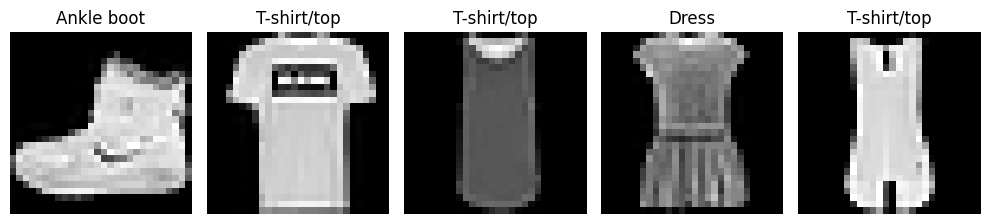

In [44]:
# Normalize pixel values to [0, 1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Get image dimensions
img_size = train_images.shape[1]
num_classes = len(class_names)

# Display sample images
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'{class_names[train_labels[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

#### Build and train CNN with Adam optimizer

In [45]:
adam_model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

adam_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training with Adam optimizer...")
adam_history = adam_model.fit(train_images, train_labels, epochs=10, validation_split=0.2, verbose=1)

Training with Adam optimizer...
Epoch 1/10


/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/.conda/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-06 14:56:50.423583: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_245', 4 bytes spill stores, 4 bytes spill loads



1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7574 - loss: 0.6708 - val_accuracy: 0.8704 - val_loss: 0.3662
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - accuracy: 0.8764 - loss: 0.3353 - val_accuracy: 0.8856 - val_loss: 0.3184
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - accuracy: 0.8955 - loss: 0.2824 - val_accuracy: 0.8954 - val_loss: 0.2851
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.9100 - loss: 0.2376 - val_accuracy: 0.8997 - val_loss: 0.2837
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - accuracy: 0.9239 - loss: 0.2061 - val_accuracy: 0.9082 - val_loss: 0.2565
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.9320 - loss: 0.1865 - val_accuracy: 0.9117 - val_loss: 0.2513
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.9394 - loss: 0.1646 - val_accuracy: 0.9111 - val_loss: 0.2487
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - accuracy: 0.9468 - loss: 0.1448

#### Build and train CNN with RMSProp optimizer

In [46]:
rmsprop_model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

rmsprop_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training with RMSProp optimizer...")
rmsprop_history = rmsprop_model.fit(train_images, train_labels, epochs=10, validation_split=0.2, verbose=1)

Training with RMSProp optimizer...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7667 - loss: 0.6443 - val_accuracy: 0.8745 - val_loss: 0.3499
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.8819 - loss: 0.3174 - val_accuracy: 0.8920 - val_loss: 0.3011
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - accuracy: 0.9011 - loss: 0.2667 - val_accuracy: 0.8986 - val_loss: 0.2811
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - accuracy: 0.9133 - loss: 0.2390 - val_accuracy: 0.9061 - val_loss: 0.2669
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - accuracy: 0.9230 - loss: 0.2129 - val_accuracy: 0.9128 - val_loss: 0.2515
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.9309 - loss: 0.1889 - val_accuracy: 0.9067 - val_loss: 0.2616
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.9386 - loss: 0.1684 - val_accuracy: 0.9103 - val_loss: 0.2596
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1

#### Compare training performance

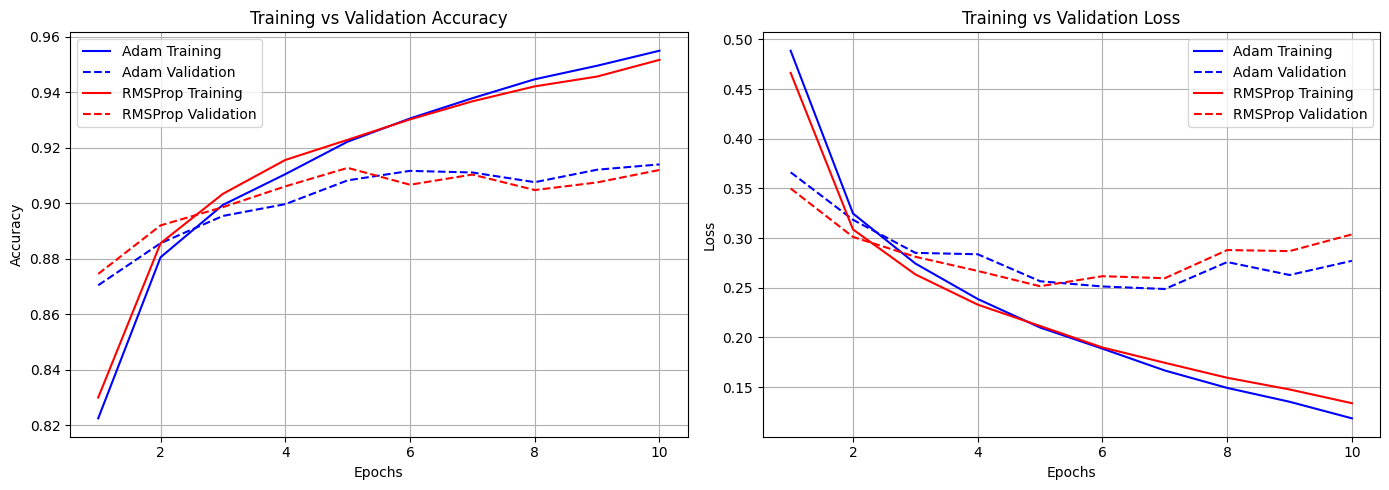

In [47]:
# Extract history
adam_acc = adam_history.history['accuracy']
adam_val_acc = adam_history.history['val_accuracy']
adam_loss = adam_history.history['loss']
adam_val_loss = adam_history.history['val_loss']

rmsprop_acc = rmsprop_history.history['accuracy']
rmsprop_val_acc = rmsprop_history.history['val_accuracy']
rmsprop_loss = rmsprop_history.history['loss']
rmsprop_val_loss = rmsprop_history.history['val_loss']

epochs = range(1, len(adam_acc) + 1)

# Plot comparison
plt.figure(figsize=(14, 5))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(epochs, adam_acc, 'b-', label='Adam Training')
plt.plot(epochs, adam_val_acc, 'b--', label='Adam Validation')
plt.plot(epochs, rmsprop_acc, 'r-', label='RMSProp Training')
plt.plot(epochs, rmsprop_val_acc, 'r--', label='RMSProp Validation')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss comparison
plt.subplot(1, 2, 2)
plt.plot(epochs, adam_loss, 'b-', label='Adam Training')
plt.plot(epochs, adam_val_loss, 'b--', label='Adam Validation')
plt.plot(epochs, rmsprop_loss, 'r-', label='RMSProp Training')
plt.plot(epochs, rmsprop_val_loss, 'r--', label='RMSProp Validation')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Evaluate models on test set

In [48]:
# Evaluate Adam model
adam_test_loss, adam_test_acc = adam_model.evaluate(test_images, test_labels, verbose=0)
print("Adam Model:")
print(f"  Test Accuracy: {adam_test_acc:.4f}")
print(f"  Test Loss: {adam_test_loss:.4f}")

# Evaluate RMSProp model
rmsprop_test_loss, rmsprop_test_acc = rmsprop_model.evaluate(test_images, test_labels, verbose=0)
print("\nRMSProp Model:")
print(f"  Test Accuracy: {rmsprop_test_acc:.4f}")
print(f"  Test Loss: {rmsprop_test_loss:.4f}")

Adam Model:
  Test Accuracy: 0.9053
  Test Loss: 0.3123

RMSProp Model:
  Test Accuracy: 0.9120
  Test Loss: 0.3134


#### Generate predictions and confusion matrices

In [49]:
# Get predictions
adam_predictions = np.argmax(adam_model.predict(test_images), axis=1)
rmsprop_predictions = np.argmax(rmsprop_model.predict(test_images), axis=1)

# Generate confusion matrices
adam_cm = confusion_matrix(test_labels, adam_predictions)
rmsprop_cm = confusion_matrix(test_labels, rmsprop_predictions)

print("Predictions generated successfully!")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Predictions generated successfully!


#### Compare confusion matrices

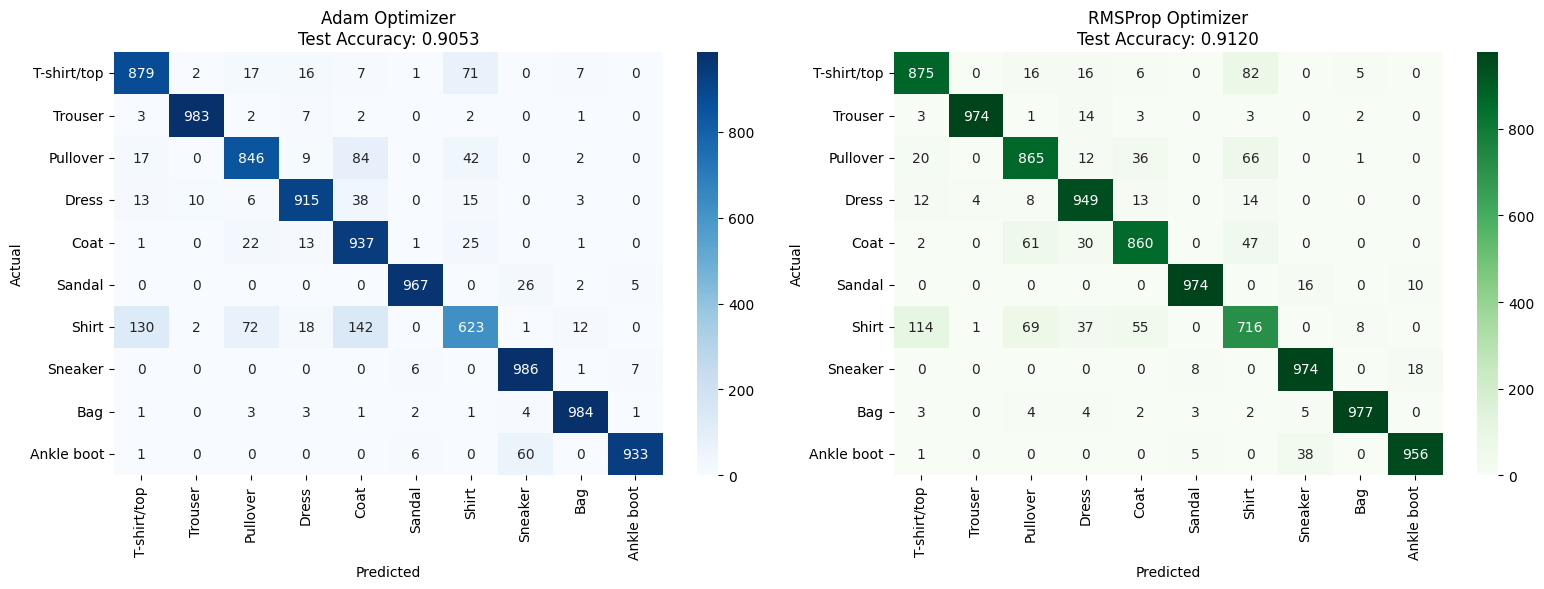

In [50]:
# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Adam confusion matrix
sns.heatmap(adam_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title(f'Adam Optimizer\nTest Accuracy: {adam_test_acc:.4f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# RMSProp confusion matrix
sns.heatmap(rmsprop_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title(f'RMSProp Optimizer\nTest Accuracy: {rmsprop_test_acc:.4f}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

#### Classification reports

In [51]:
print("="*70)
print("ADAM OPTIMIZER - CLASSIFICATION REPORT")
print("="*70)
print(classification_report(test_labels, adam_predictions, target_names=class_names))

print("\n" + "="*70)
print("RMSPROP OPTIMIZER - CLASSIFICATION REPORT")
print("="*70)
print(classification_report(test_labels, rmsprop_predictions, target_names=class_names))

# Summary comparison
print("\n" + "="*70)
print("OPTIMIZER COMPARISON SUMMARY")
print("="*70)
print(f"Adam    - Test Accuracy: {adam_test_acc:.4f}, Test Loss: {adam_test_loss:.4f}")
print(f"RMSProp - Test Accuracy: {rmsprop_test_acc:.4f}, Test Loss: {rmsprop_test_loss:.4f}")
print("="*70)

ADAM OPTIMIZER - CLASSIFICATION REPORT
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.88      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.93      0.92      0.92      1000
        Coat       0.77      0.94      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.80      0.62      0.70      1000
     Sneaker       0.92      0.99      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.99      0.93      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000


RMSPROP OPTIMIZER - CLASSIFICATION REPORT
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.88      0.86      1000
     Trouser       0.99      0.97      0.98      1